# K Nearest Neighbour

It assumes that similar things exist in close proximity.   
Used for both classification and regression.  

Algorithm:  
Step 1: Choose the no. K of neighbours  
Step 2: Take the K nearest neighbours of the new data points by Euclidean distance  
Step 3: Among K Neighbours, count the no. of data points in each category  
Step 4: Assign new data point to the category where you counted most neighbour  

Case 1: K = 3, Solid Circle  - Assigned to Red Triangle Group  
Case 2: K = 5, Dashed Circle  - Assigned to Blue Square Group  
<img src="Image/KNN.JPG" width="200">
<font size=1><center>Image Source:Wikipedia</center></font>

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data/Classification/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

X = X.astype(float)
y = y.astype(float)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling(Standardization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

# Predicting the results on Test set
y_pred = classifier.predict(X_test)

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)


[[64  4]
 [ 3 29]]


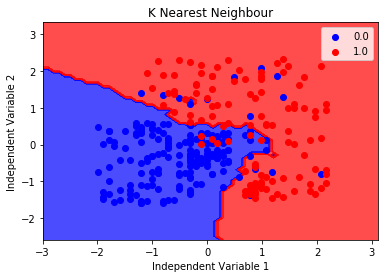

In [13]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
#Define Variables
clf = classifier
h = 0.1
X_plot, z_plot = X_train, y_train 

#Template for all Regression
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh
Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,
             alpha = 0.7, cmap = ListedColormap(('blue', 'red')))


for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(X_plot[z_plot == j, 0], X_plot[z_plot == j, 1],
                c = ['blue', 'red'][i], cmap = ListedColormap(('blue', 'red')), label = j)
   #X[:, 0], X[:, 1] 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('K Nearest Neighbour')
plt.xlabel('Independent Variable 1')
plt.ylabel('Independent Variable 2')
plt.legend()

plt.show()